In [96]:
# # memory footprint support libraries/code
# # !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install -q gputil
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [98]:
df = pd.read_csv('heart.csv')
df.head

<bound method NDFrame.head of      age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0     63    1                3         145          233                    1   
1     37    1                2         130          250                    0   
2     41    0                1         130          204                    0   
3     56    1                1         120          236                    0   
4     57    0                0         120          354                    0   
..   ...  ...              ...         ...          ...                  ...   
298   57    0                0         140          241                    0   
299   45    1                3         110          264                    0   
300   68    1                0         144          193                    1   
301   57    1                0         130          131                    0   
302   57    0                1         130          236                    0   

     rest

In [99]:
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [100]:
df.info

<bound method DataFrame.info of      age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0     63    1                3         145          233                    1   
1     37    1                2         130          250                    0   
2     41    0                1         130          204                    0   
3     56    1                1         120          236                    0   
4     57    0                0         120          354                    0   
..   ...  ...              ...         ...          ...                  ...   
298   57    0                0         140          241                    0   
299   45    1                3         110          264                    0   
300   68    1                0         144          193                    1   
301   57    1                0         130          131                    0   
302   57    0                1         130          236                    0   

     re

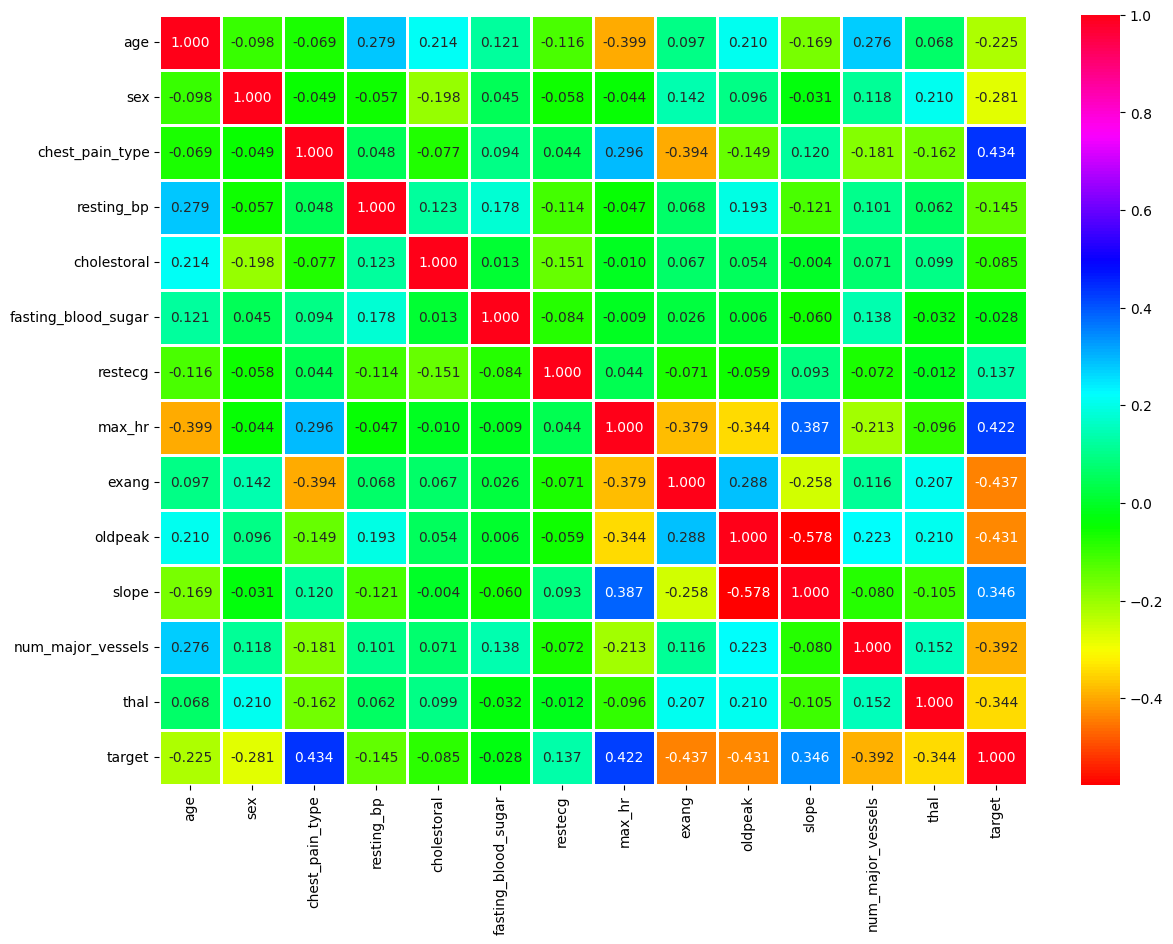

In [101]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [102]:
df.groupby('chest_pain_type',as_index=False)['target'].mean()

,chest_pain_type,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [103]:
df.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [104]:
df.groupby('thal',as_index=False)['target'].mean()

,thal,target
0,0,0.500000
1,1,0.333333
2,2,0.783133
3,3,0.239316


In [105]:
df.groupby('target').mean()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


C:\Users\Asus\AppData\Local\Temp\ipykernel_18320\925223036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'],rug=True)


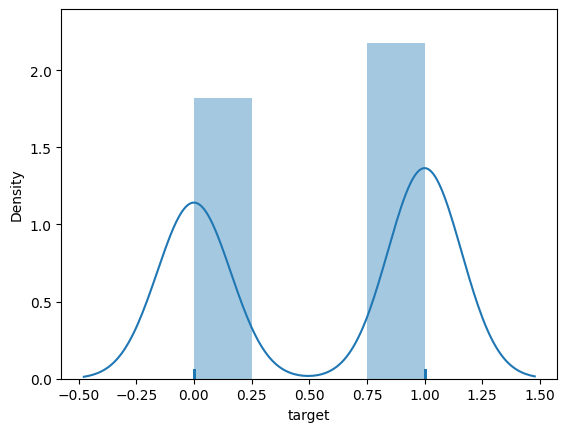

In [106]:
sns.distplot(df['target'],rug=True)
plt.show()

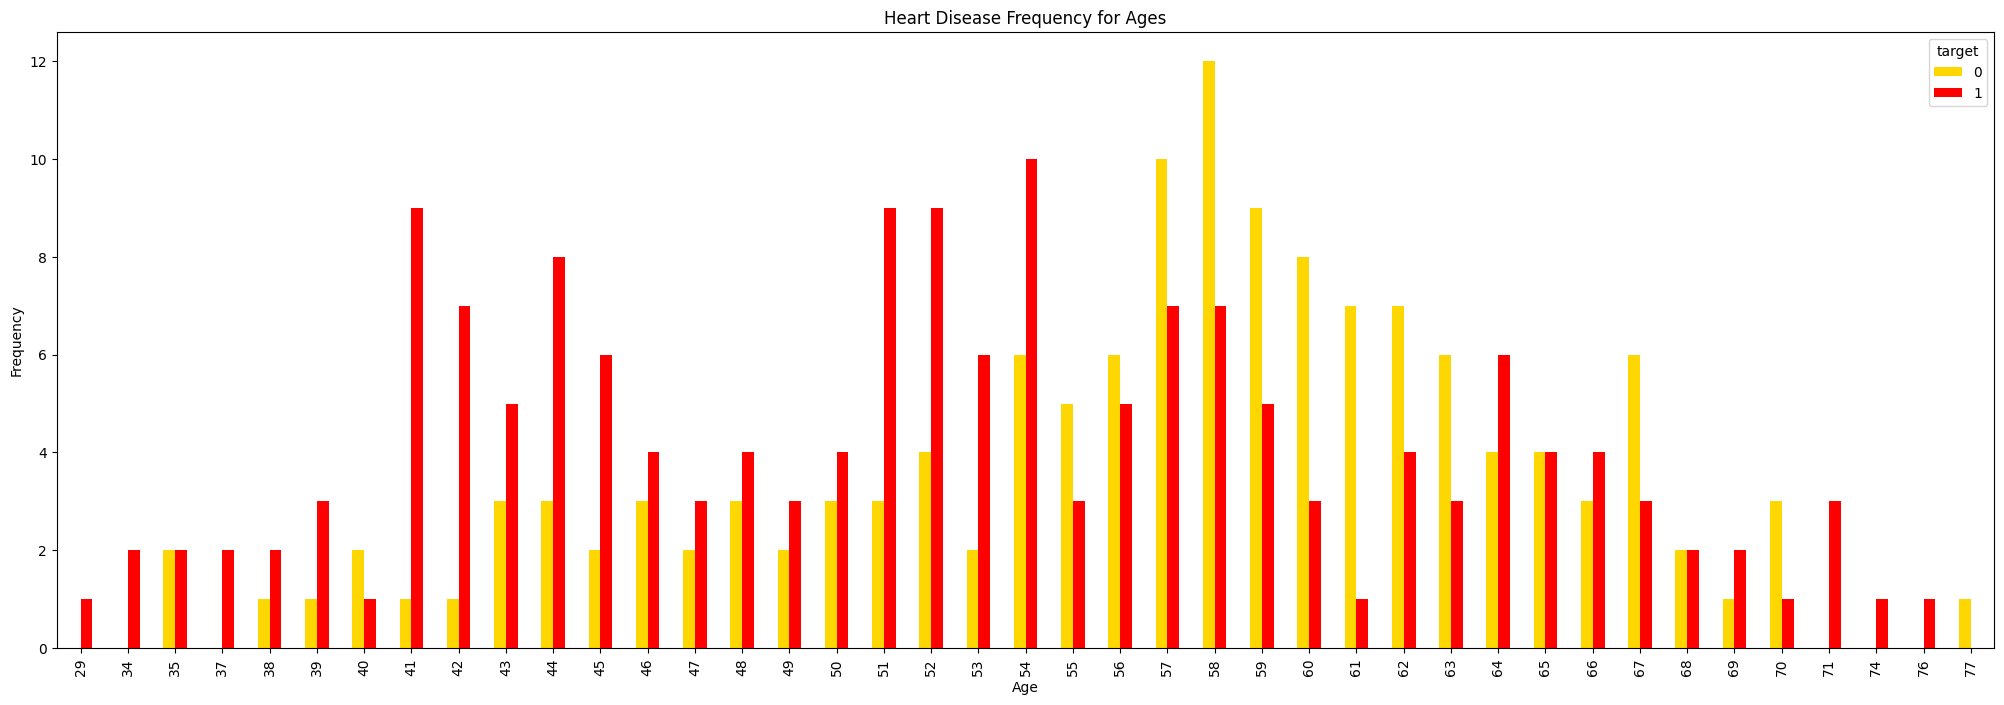

In [107]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','red' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

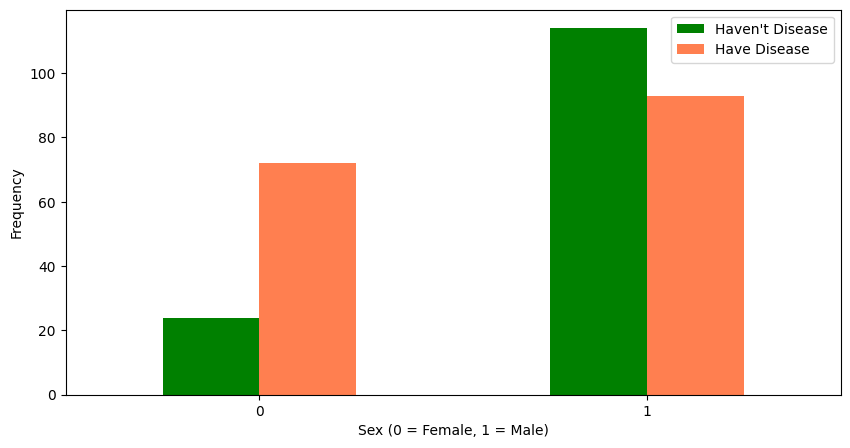

In [108]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['green','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18320\944623240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='resting_bp', data=df, palette='rainbow')


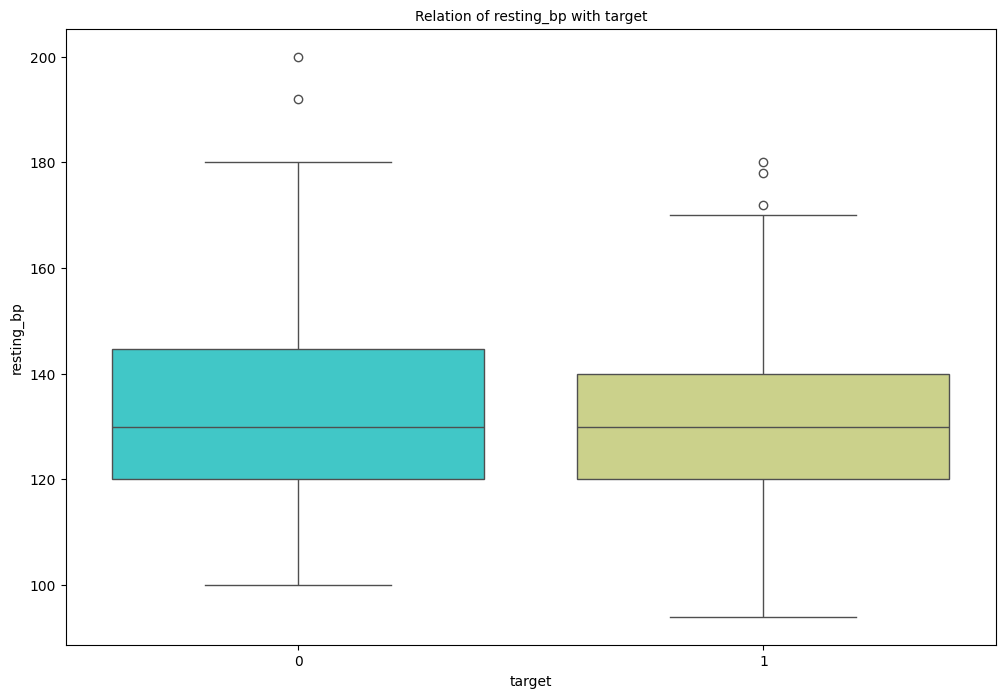

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(x='target', y='resting_bp', data=df, palette='rainbow')
plt.title('Relation of resting_bp with target', fontsize=10)
plt.show()

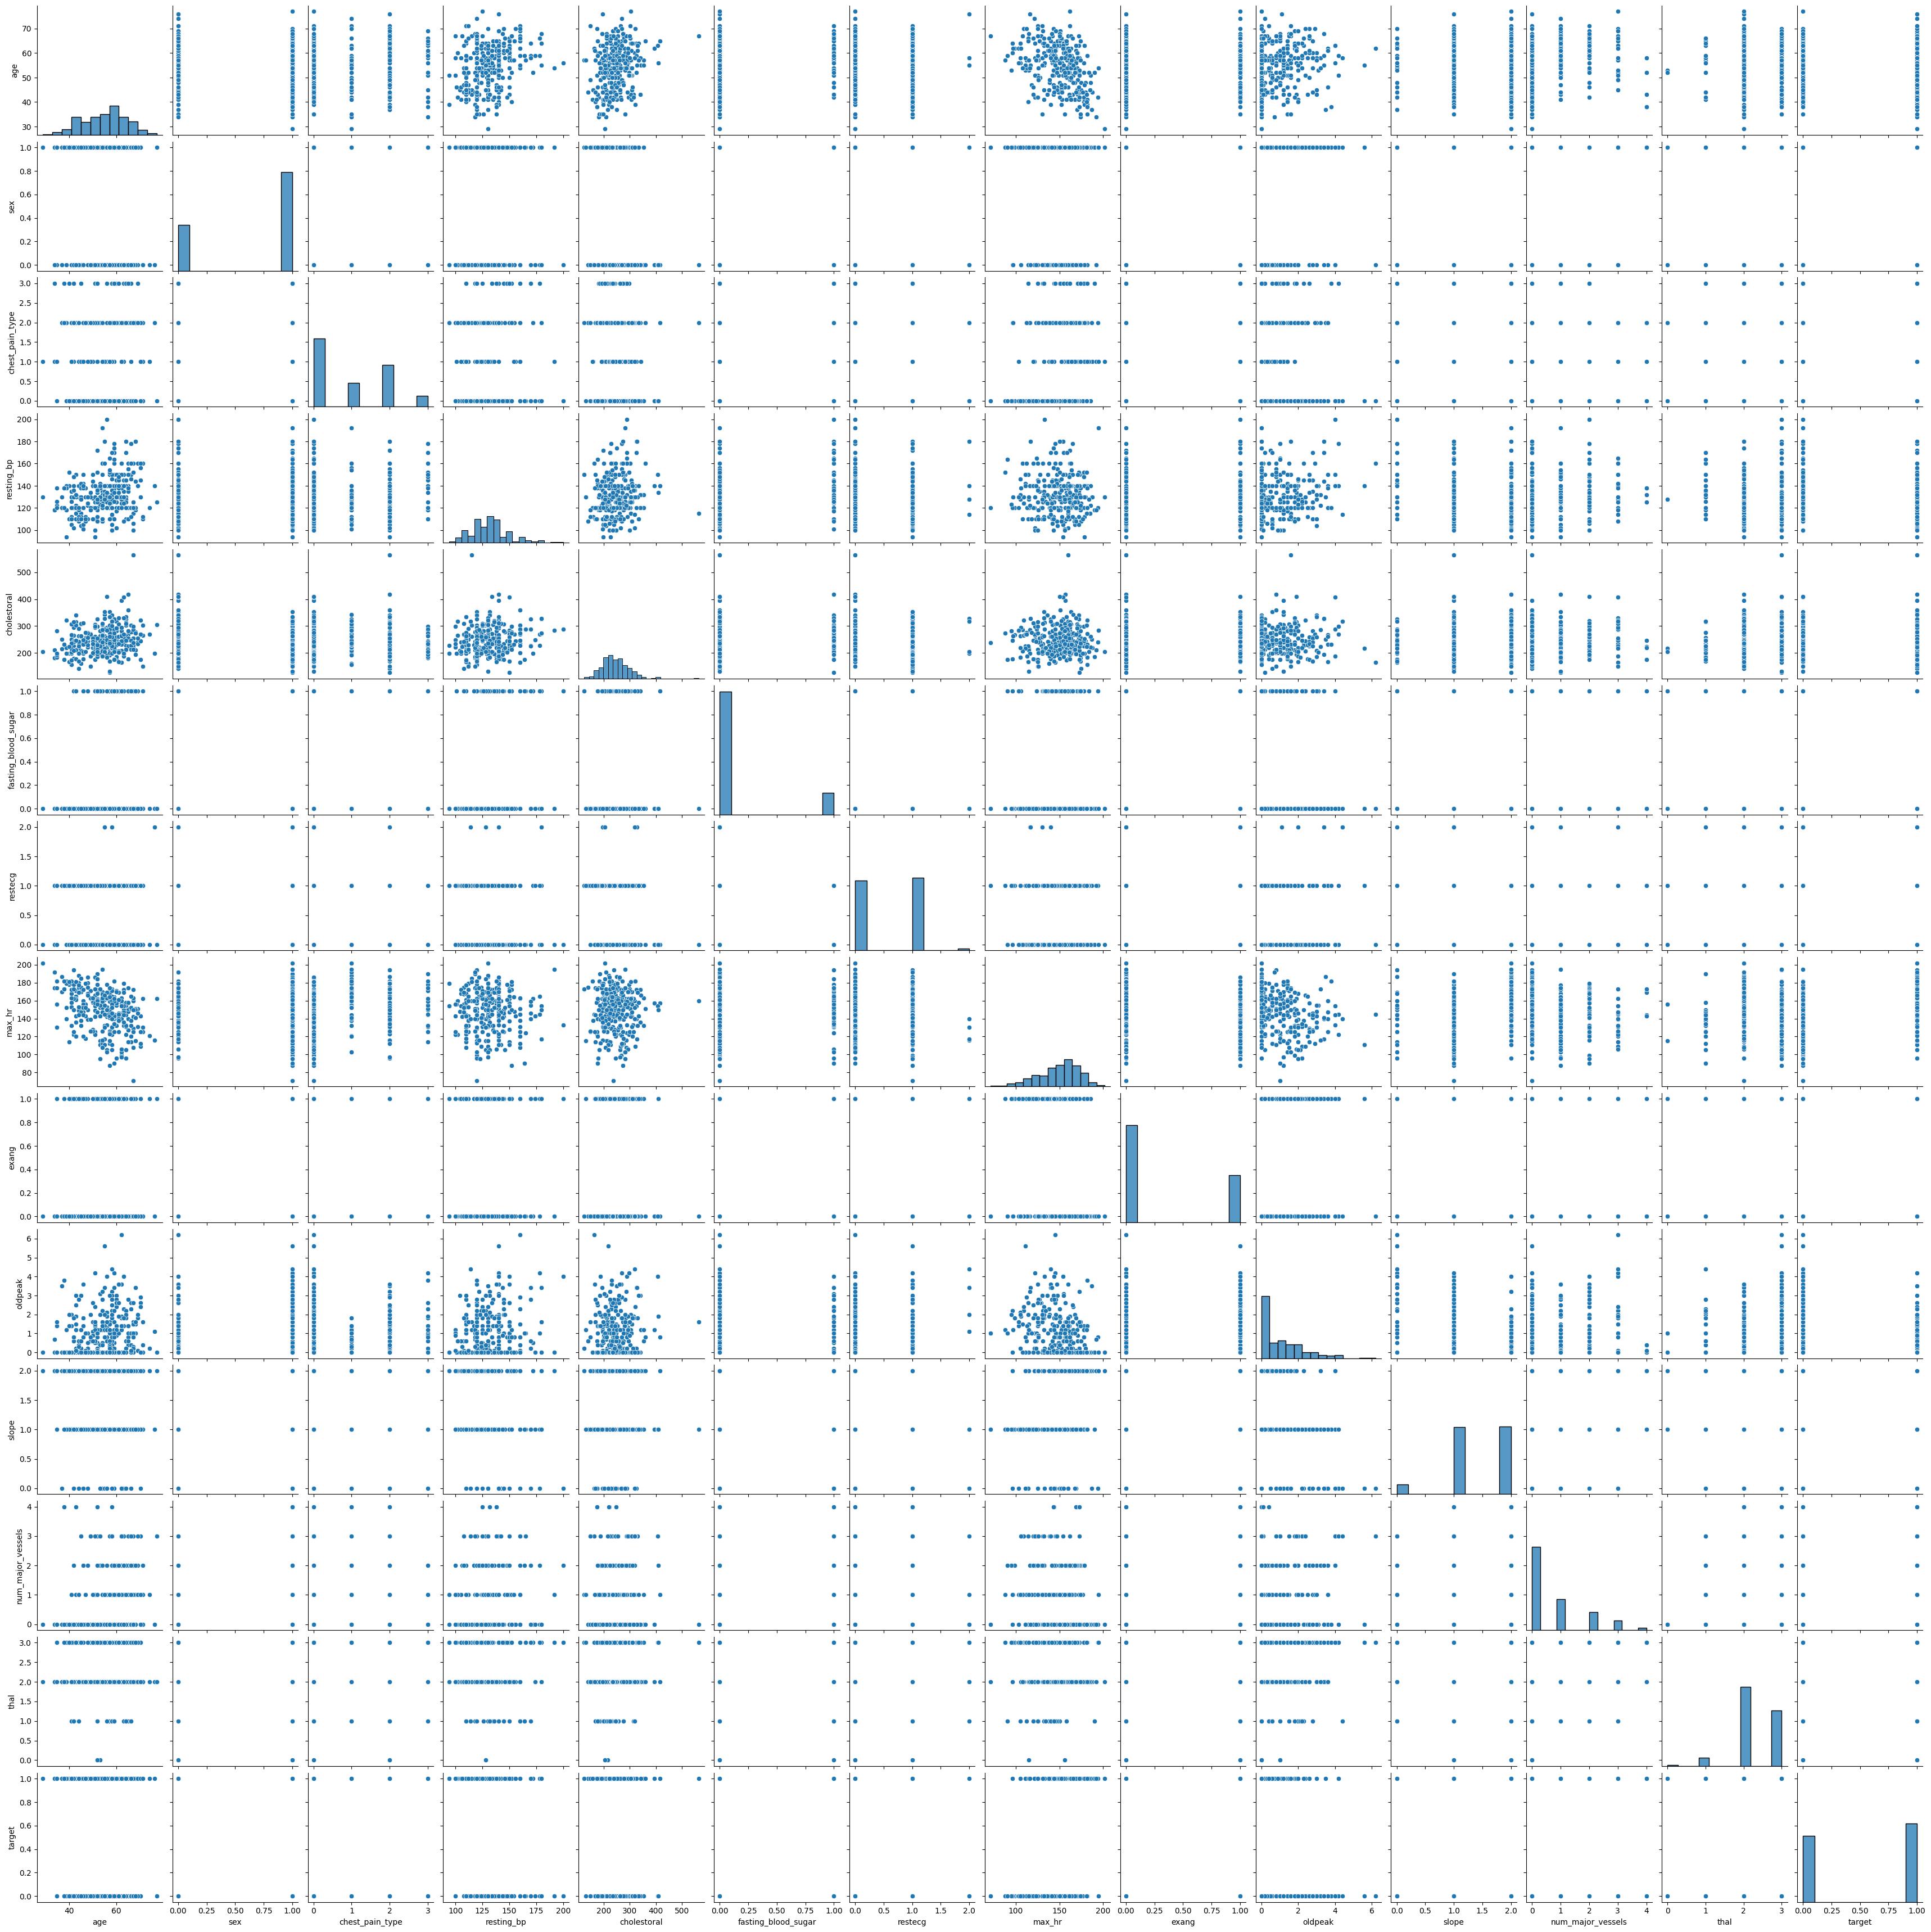

In [110]:
sns.pairplot(data=df)

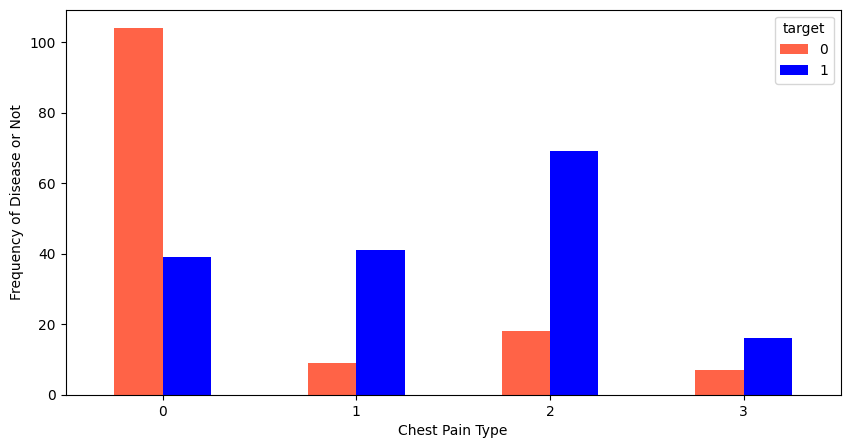

In [111]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','blue' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

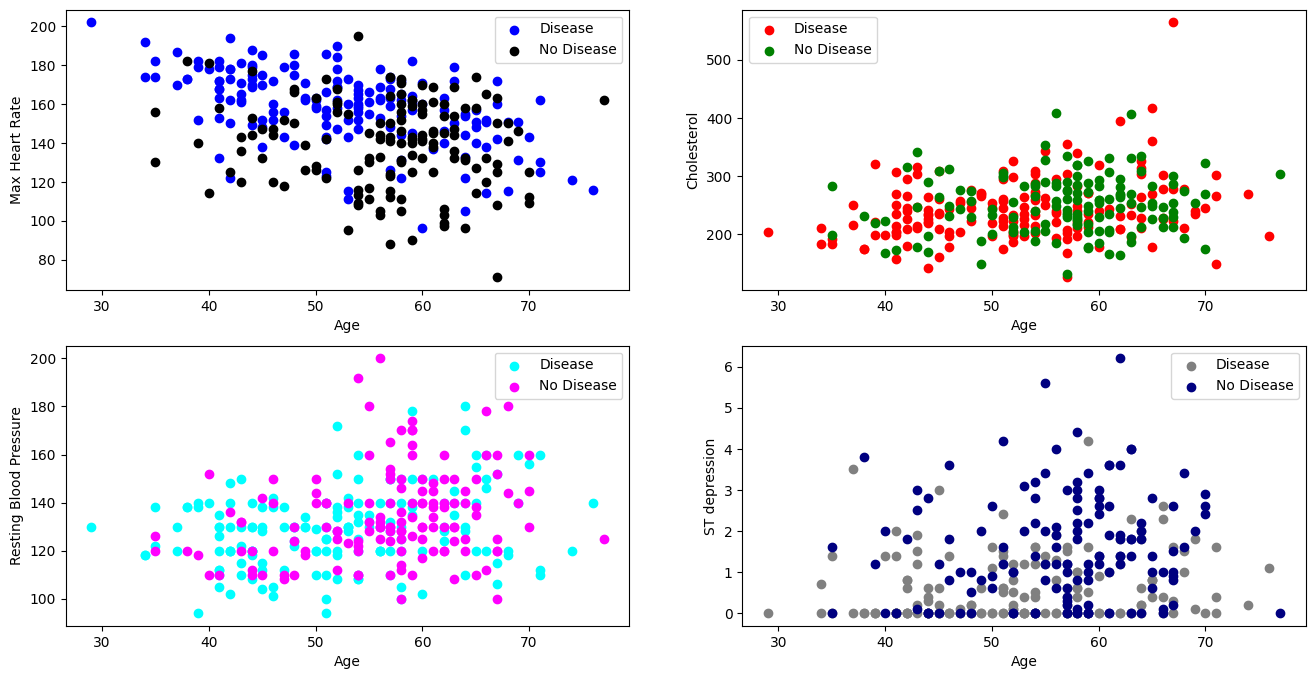

In [112]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.max_hr[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.max_hr[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.cholestoral[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.cholestoral[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.resting_bp[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.resting_bp[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Memuat dataset dari file CSV
data = pd.read_csv('heart.csv')

# Pisahkan fitur dan target
X = data.drop(columns=['target'])  
y = data['target']

# Model RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Mengambil tingkat kepentingan fitur
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mengambil 13 fitur terpenting
imp_features = feature_imp.index[:13]
print(imp_features)


Index(['chest_pain_type', 'max_hr', 'num_major_vessels', 'thal', 'oldpeak',
       'age', 'cholestoral', 'resting_bp', 'exang', 'slope', 'sex', 'restecg',
       'fasting_blood_sugar'],
      dtype='object')


In [128]:
imp_features = feature_imp.index[:13]
imp_features

Index(['chest_pain_type', 'max_hr', 'num_major_vessels', 'thal', 'oldpeak',
       'age', 'cholestoral', 'resting_bp', 'exang', 'slope', 'sex', 'restecg',
       'fasting_blood_sugar'],
      dtype='object')

In [131]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
import pandas as pd

# Memuat dataset dari file CSV
data = pd.read_csv('heart.csv')  

# Memilih hanya 13 fitur pertama
X = data.iloc[:, :13].values
y = data['target'].values  

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model ANN
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Melatih model
model.fit(X_train_scaled, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')

print("Akurasi model:", accuracy)
print("Recall:", recall)
print("Presisi:", precision)


Akurasi model: 0.8360655737704918
Recall: 0.8372844827586207
Presisi: 0.8365591397849462


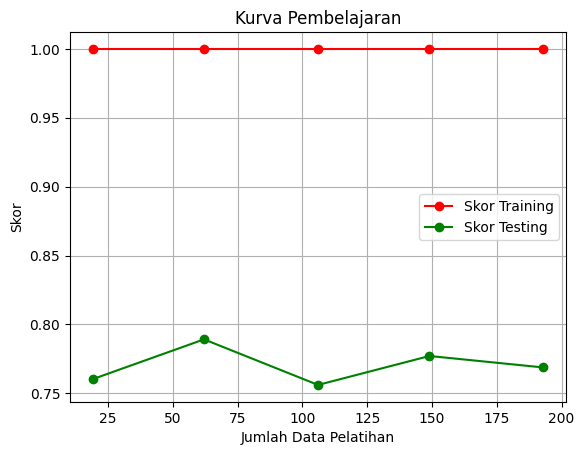

In [132]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import learning_curve

# Mendapatkan kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

# Menghitung rata-rata dari skor training dan testing
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure()
plt.title("Kurva Pembelajaran")
plt.xlabel("Jumlah Data Pelatihan")
plt.ylabel("Skor")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor Training")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Skor Testing")

plt.legend(loc="best")
plt.show()


In [135]:
import pickle

# Simpan model ke file
with open('deseaseheart.sav', 'wb') as file:
    pickle.dump(model, file)